In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import sys
import os
from src.kde import *
from cdf import *
from pinball_crps import *
from poly_fit import *
from spline import *
from scipy import interpolate
from miscellaneous import find
from kernel_herding import *
from poly_fit import *
from scipy.optimize import least_squares

In [2]:
xtrain = np.load("data/data_21_23.npy")
# data 2023 test data
xtest=xtrain[365:,:]
# data 2021 train data
xtrain=xtrain[0:366,:]
# m rows
m=xtrain.shape[0]
# n columns
n=xtrain.shape[1]


# select hour of interest
n=8

# reshape
xtrain_n=xtrain[1:, n].reshape(1,m-1)
xtest_n=xtest[1:, n]


In [3]:
x=xtrain_n.reshape(xtrain_n.size,)

x=np.sort(x)
# x=x[70:270]
y=cdf_funct(x)


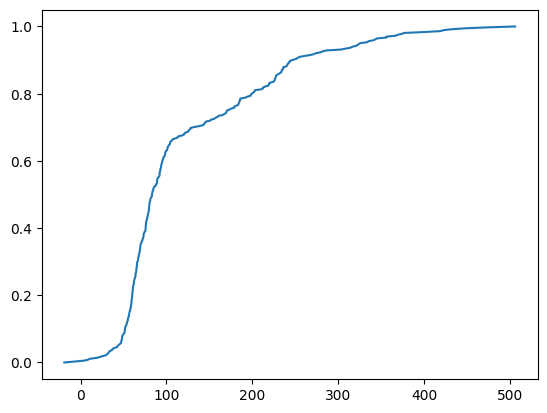

In [4]:
plt.plot(x,y)

In [5]:
y

array([0.        , 0.00274725, 0.00549451, 0.00824176, 0.01098901,
       0.01373626, 0.01648352, 0.01923077, 0.02197802, 0.02472527,
       0.02747253, 0.03021978, 0.03296703, 0.03571429, 0.03846154,
       0.04120879, 0.04395604, 0.0467033 , 0.04945055, 0.0521978 ,
       0.05494505, 0.05769231, 0.06043956, 0.06318681, 0.06593407,
       0.06868132, 0.07142857, 0.07417582, 0.07692308, 0.07967033,
       0.08241758, 0.08516484, 0.08791209, 0.09065934, 0.09340659,
       0.09615385, 0.0989011 , 0.10164835, 0.1043956 , 0.10714286,
       0.10989011, 0.11263736, 0.11538462, 0.11813187, 0.12087912,
       0.12362637, 0.12637363, 0.12912088, 0.13186813, 0.13461538,
       0.13736264, 0.14010989, 0.14285714, 0.1456044 , 0.14835165,
       0.1510989 , 0.15384615, 0.15659341, 0.15934066, 0.16208791,
       0.16483516, 0.16758242, 0.17032967, 0.17307692, 0.17582418,
       0.17857143, 0.18131868, 0.18406593, 0.18681319, 0.18956044,
       0.19230769, 0.19505495, 0.1978022 , 0.20054945, 0.20329

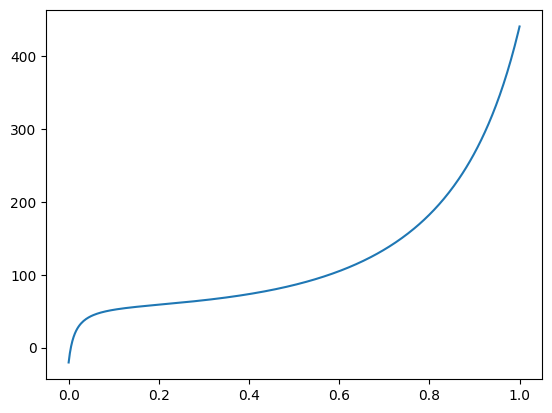

In [6]:
popt, pcov = curve_fit(rational_3, y,x)
plt.plot(y, rational_3(y, *popt))

In [7]:
ans=a[idx]+b[idx-1]*(unif-y[idx])

NameError: name 'a' is not defined

In [8]:
s=time.time()
np.linspace(0,1,100000)
print(time.time()-s)

s=time.time()
np.random.uniform(0,1,100000)
np.sort(unif)
print(time.time()-s)



0.00024390220642089844


NameError: name 'unif' is not defined

In [9]:
30032-10011-10011

10010

In [10]:
s=time.time()
np.repeat(np.linspace(0,999,1000),10000)
print(time.time()-s)

0.03421807289123535


In [79]:
idx[2]

1

0.6717970371246338


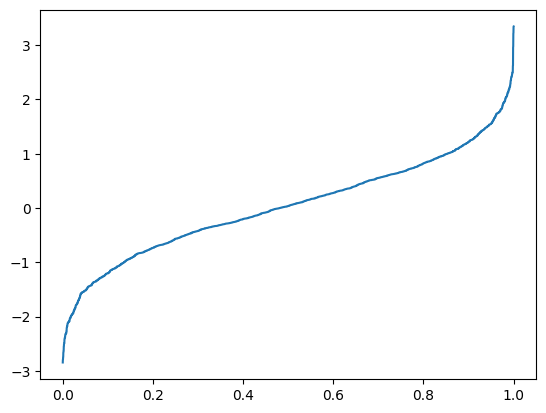

In [148]:
from numpy import searchsorted
x=np.sort(np.random.normal(0,1,2000))
y=cdf_funct(x)


a=x*1
b=(x[1:]-x[:-1])/(y[1:]-y[:-1])*0.09
unif=np.linspace(0,1,10000000)

# unif=np.random.uniform(0,1,100000)
# unif=np.sort(unif)
s=time.time()
idx=searchsorted(y, unif)
# idx=np.repeat(np.linspace(1,999,1000, dtype=int),10000)
ans=a[idx]+b[idx-1]*(unif-y[idx])
print(time.time()-s)
# plt.plot(y,x, alpha=0.4)
plt.plot(unif, ans)


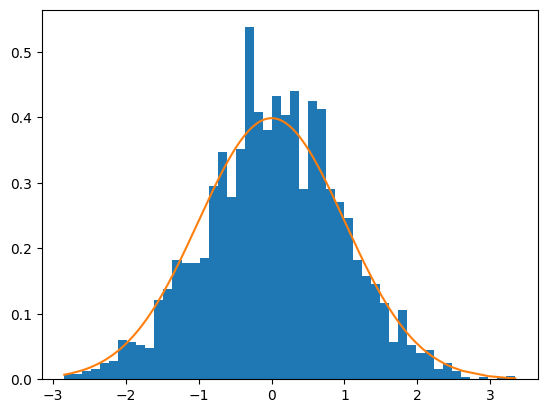

In [149]:
from scipy.stats import norm,expon
plt.hist(ans,bins=50, density=True);
plt.plot(x,norm.pdf(x))
# plt.hist(np.random.exponential(1,1000), bins=50, density=True);

In [9]:
x_sub, y_sub,fit_spl_rpol=spl_polyfit(x,y)

# rational polynomial fit order 1
# higher orders do not preserve properties of CDF
fit_rpol=polyfit(y,beta_rat_polyfit(y, np.sort(x), order=1))


# scipy inbuilt spline
tck_sub = interpolate.splrep(y_sub,x_sub, s=0, k=3)
fit_bspl_sub=interpolate.BSpline(*tck_sub)(y_sub)

tck = interpolate.splrep(y,x, k=3)
fit_bspl = interpolate.BSpline(*tck)(y)

popt, pcov = curve_fit(rational_3, y,x)

fit_gauss_newton=polyfit(y,GaussNewton(y,x,order=2))

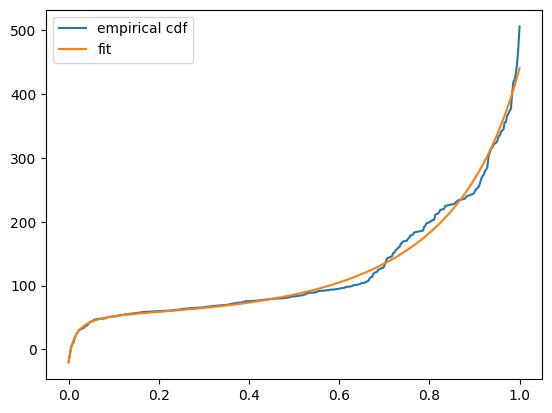

In [8]:
plt.plot(y, np.sort(x), label="empirical cdf")
# plt.plot(y, fit_rpol, label="rational polynomial of order 1")
# plt.plot(y_sub, fit_spl_rpol, label="rational polynomial spline")


# plt.plot(y, fit_bspl, label="cubic spline")
# plt.plot(y_sub, fit_bspl_sub, label="smoother cubic spline")

plt.plot(y, rational_3(y, *popt), label='fit')

# plt.plot(y,fit_gauss_newton, label="aaa")

plt.legend()

In [9]:
# simulate data
np.random.seed(10)
unif=np.random.uniform(0,1,xtrain_n.size)
unif=np.sort(unif)

sim_rpol=polyfit(unif,beta_rat_polyfit(y, np.sort(x), order=1))
sim_spl_rpol=simulate_spl_polyfit(unif,y_sub, fit_spl_rpol)
sim_bspl_sub=interpolate.BSpline(*tck_sub)(unif)

np.save("data/simulations/sim_rpol.npy",sim_rpol)
np.save("data/simulations/sim_bspl_sub.npy",sim_bspl_sub)
np.save("data/simulations/sim_spl_rpol.npy",sim_spl_rpol)


In [10]:
sim_kernel_herding=kernel_herding(xtrain_n.reshape(-1,1) ,xtrain_n.size,1)
np.save("data/simulations/sim_kernel_herding.npy",sim_kernel_herding)

step.1 step.2 step.3 step.4 step.5 

/Users/luca/Desktop/ThesisKernelMethods/src/kernel_herding.py:55: OptimizeWarning: Unknown solver options: xtol
  res = minimize(f,


step.6 step.7 step.8 step.9 step.10 step.11 step.12 step.13 step.14 step.15 step.16 step.17 step.18 step.19 step.20 step.21 step.22 step.23 step.24 step.25 step.26 step.27 step.28 step.29 step.30 step.31 step.32 step.33 step.34 step.35 step.36 step.37 step.38 step.39 step.40 step.41 step.42 step.43 step.44 step.45 step.46 step.47 step.48 step.49 step.50 step.51 step.52 step.53 step.54 step.55 step.56 step.57 step.58 step.59 step.60 step.61 step.62 step.63 step.64 step.65 step.66 step.67 step.68 step.69 step.70 step.71 step.72 step.73 step.74 step.75 step.76 step.77 step.78 step.79 step.80 step.81 step.82 step.83 step.84 step.85 step.86 step.87 step.88 step.89 step.90 step.91 step.92 step.93 step.94 step.95 step.96 step.97 step.98 step.99 step.100 step.101 step.102 step.103 step.104 step.105 step.106 step.107 step.108 step.109 step.110 step.111 step.112 step.113 step.114 step.115 step.116 step.117 step.118 step.119 step.120 step.121 step.122 step.123 step.124 step.125 step.126 step.127 

In [12]:
# code to evaluate spline with Neville's algorithm
spline_evaluate(1, tck)

506.23